# Chapter 6: Hypothesis Testing

## Example 1

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.random.seed(42)
n = 30  # Sample size
mu = 1.8  # Sample Mean
sigma = 2  # Population standard deviation
sample = np.random.normal(mu, sigma, n)

In [2]:
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # Sample standard deviation
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
margin_of_error = t_critical * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

In [3]:
print(f"Sample Mean: {sample_mean:.3f}")
print(f"Margin of Error: {margin_of_error:.3f}")
print(f"Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")
testing_value = 0
t_statistic = (testing_value - sample_mean) / (sample_std / np.sqrt(n))
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=n-1)) 

Sample Mean: 1.424
Margin of Error: 0.672
Confidence Interval: [0.752, 2.096]


In [4]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, loc=sample_mean, scale=sample_std/np.sqrt(n))

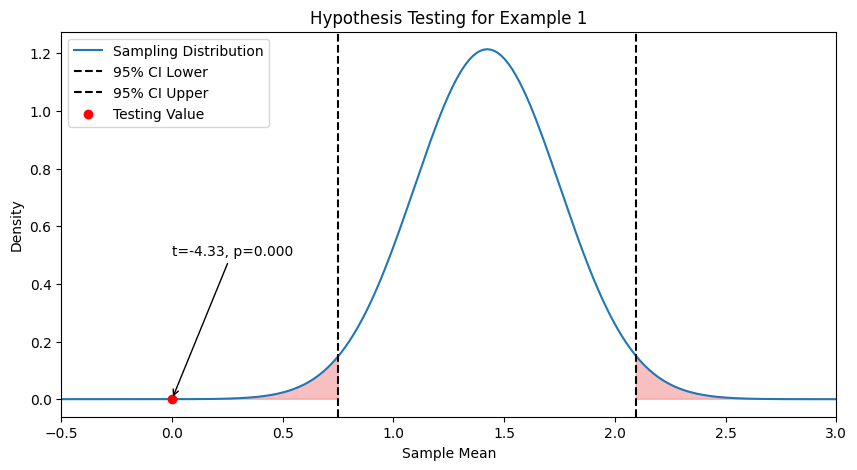

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Sampling Distribution')
plt.axvline(ci_lower, linestyle='dashed', color='black', label='95% CI Lower')
plt.axvline(ci_upper, linestyle='dashed', color='black', label='95% CI Upper')
plt.fill_between(x, y, where=(x <= ci_lower), color='lightcoral', alpha=0.5)
plt.fill_between(x, y, where=(x >= ci_upper), color='lightcoral', alpha=0.5)
plt.scatter(testing_value, stats.norm.pdf(testing_value, loc=sample_mean, scale=sample_std/np.sqrt(n)),  color='red', label='Testing Value', zorder=3)
plt.annotate(f't={t_statistic:.2f}, p={p_value:.3f}',  xy=(testing_value, stats.norm.pdf(testing_value, loc=sample_mean, scale=sample_std/np.sqrt(n))),    xytext=(0, 0.5),  arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlim(-0.5,3)
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Hypothesis Testing for Example 1')
plt.legend()
plt.show()

## Example 2

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.random.seed(42)
n = 50  # Sample size
mu = 1.8  # Sample Mean
sigma = 2  # Population standard deviation
sample = np.random.normal(mu, sigma, n)

In [7]:
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)  # Sample standard deviation
alpha = 0.05  # Hypothesis Testing Parameters
null_value = 0  # Null hypothesis mean
t_critical = stats.t.ppf(1 - alpha, df=n-1)  # One-tailed test
margin_of_error = t_critical * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_of_error
ci_upper = np.inf  # One-tailed test has an upper bound at infinity

In [8]:
print(f"Sample Mean: {sample_mean:.3f}")
print(f"Margin of Error: {margin_of_error:.3f}")
print(f"Confidence Interval: [{ci_lower:.3f}, $\inf$]")
t_statistic = (sample_mean - null_value) / (sample_std / np.sqrt(n))
p_value = 1 - stats.t.cdf(t_statistic, df=n-1)  # One-tailed test
x = np.linspace(-1, 4, 1000)
y = stats.norm.pdf(x, loc=sample_mean, scale=sample_std/np.sqrt(n))

Sample Mean: 1.349
Margin of Error: 0.443
Confidence Interval: [0.906, $\inf$]


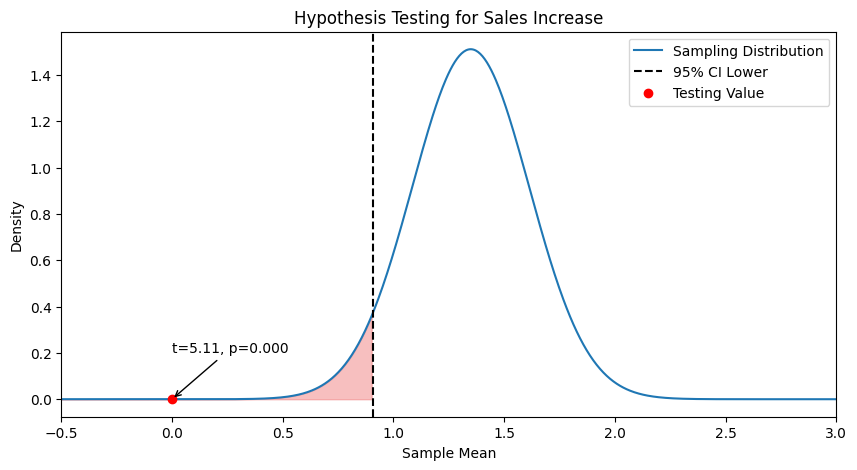

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Sampling Distribution')
plt.axvline(ci_lower, linestyle='dashed', color='black', label='95% CI Lower')
plt.fill_between(x, y, where=(x <= ci_lower), color='lightcoral', alpha=0.5)
plt.scatter(null_value, stats.norm.pdf(null_value, loc=sample_mean, scale=sample_std/np.sqrt(n)), color='red', label='Testing Value', zorder=3)
plt.annotate(f't={t_statistic:.2f}, p={p_value:.3f}',  xy=(null_value, stats.norm.pdf(null_value, loc=sample_mean, scale=sample_std/np.sqrt(n))), xytext=(0, 0.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlim(-0.5, 3)
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Hypothesis Testing for Sales Increase')
plt.legend()
plt.show()

## t-Distribution

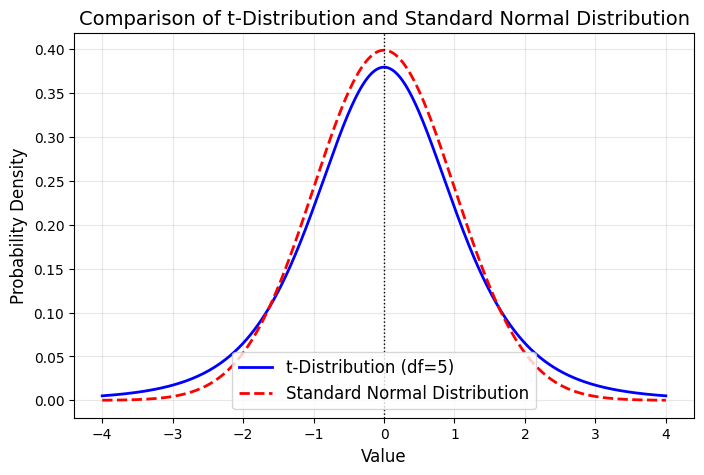

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Generate x values for the plot
x = np.linspace(-4, 4, 1000)

# Compute the PDFs for t-distribution and standard normal distribution
df = 5  # Suppose there are only 6 data points. The degrees of freedom is n - 1 = 6 - 1 = 5.
t_pdf = t.pdf(x, df)  # T-distribution with df = 5
norm_pdf = norm.pdf(x)  # Standard normal distribution

# Plot the distributions
plt.figure(figsize=(8, 5))
plt.plot(x, t_pdf, label=f't-Distribution (df={df})', color='blue', linewidth=2)
plt.plot(x, norm_pdf, label='Standard Normal Distribution', color='red', linestyle='--', linewidth=2)

# Add labels, legend, and title
plt.title("Comparison of t-Distribution and Standard Normal Distribution", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.axvline(0, color='black', linestyle=':', linewidth=1)  # Highlight the mean
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

## One-sample Two-sided t-test

In [11]:
from scipy import stats
import numpy as np

# Sample data
sleep_hours = [7.1, 8.4, 7.8, 6.9, 8.5, 7.6, 8.0, 7.3, 8.2, 7.9, 8.1, 7.5, 7.7, 8.3, 7.6]
# Population mean
mu_0 = 8

# Conduct a two-sided one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sleep_hours, mu_0)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: -1.6929891274810585
P-Value: 0.11258163681599478


## One-sample One-sided t-test

In [12]:
import numpy as np
from scipy import stats

# Data: Resting heart rates from 20 participants
heart_rates = [70, 68, 71, 69, 67, 73, 66, 71, 70, 69, 68, 67, 72, 70, 69, 68, 65, 67, 70, 69]

# Step 1: Calculate sample mean and standard deviation
sample_mean = np.mean(heart_rates)
sample_std = np.std(heart_rates, ddof=1)  # Use ddof=1 for sample standard deviation
sample_size = len(heart_rates)

# Step 2: Calculate the t-statistic for the one-sample one-sided t-test
population_mean = 72  # The hypothesized population mean
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# Step 3: Degrees of freedom
df = sample_size - 1

# Step 4: Find the p-value for a one-sided t-test
p_value = stats.t.cdf(t_statistic, df)

# Step 5: Set significance level (alpha)
alpha = 0.05

# Step 6: Decision Rule
if p_value < alpha:
    result = "reject the null hypothesis"
else:
    result = "fail to reject the null hypothesis"

# Output results
print(f"Sample mean: {sample_mean:.2f}")
print(f"Sample standard deviation: {sample_std:.2f}")
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Decision: {result}")

Sample mean: 68.95
Sample standard deviation: 2.01
t-statistic: -6.78
p-value: 0.0000
Decision: reject the null hypothesis
